# Regression Exercises

## Linear

In [1]:
# Loading data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read data from Github
data_url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/ex1data2.txt"
data_array = np.genfromtxt(data_url, delimiter=',')

# The columns in this data set are define as folows:
"""
    0 = floor area
    1 = number of bedrooms
    2 = sale price
"""
    
# Store the relevant columns in more descriptive variables
x_sqft = data_array[:,0]
y_value = data_array[:,2]

Here we'll build off of the tutorial exercise, first finding the best linear fit for floor area (sqft) vs valued price (USD). Recall that setting the derivative = 0 and solving for 𝑏 & 𝑚 produces formula for the best fit trend:
$$ m = \frac{\sum^n_{i=1} (x_i-x_{mean})(y_i-y_{mean})}{\sum^n_{i=1} (x_i-x_{mean})^2} $$
$$ b = y_{mean}-m*x_{mean} $$

In [2]:
import sklearn.linear_model as lm

def find_best_fit(xx,yy):
    '''
      This function finds the best linear fit for yy vs xx
    '''
  
    # YOUR CODE HERE
    model = lm.LinearRegression()

    xx = xx.reshape(-1,1)
    model.fit(xx, yy)
    return model.coef_, model.intercept_


In [3]:
# Use your function to show the best fit values for our data
(mm, bb) = find_best_fit(x_sqft, y_value)
fit_str = 'y = {aa:.1f}x + {bb:.1f}'
mm = mm[0]
print(fit_str.format(aa=mm,bb=bb))

y = 134.5x + 71270.5


Now we have the best fit trend line that minimizes total error for our data, let's try plotting it and see what it looks like. Since its just an equation, we need to *sample* the curve in order to plot it. To do this, we'll find the difference between the largest and smallest floor area, and divide it into 100 sample points.

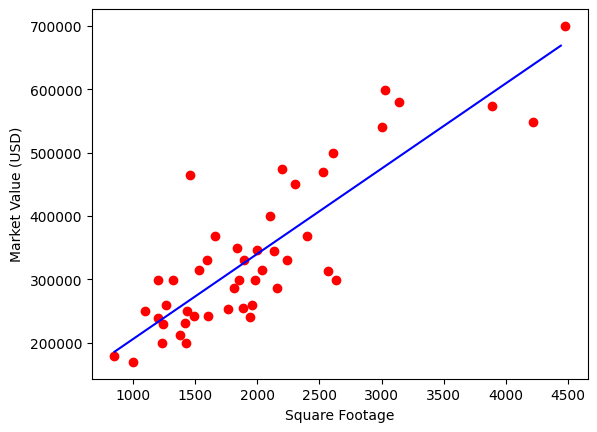

In [4]:
# Plot the data
min_x = min(x_sqft)
max_x = max(x_sqft)
steps = 100

# Sample the range from minimum to maximum sqft to get 100 points
x_chart = range(0, steps) * (max_x - min_x) / steps + min_x
y_chart = mm * x_chart + bb

# Apply the best fit equation to each sample point and plot the result
plt.plot(x_sqft, y_value, 'ro', x_chart, y_chart, 'b-')
plt.xlabel("Square Footage")
plt.ylabel("Market Value (USD)")
plt.show()

1: Given these parameters, how much should a house with 1600 sqft cost?

(YOUR ANSWER HERE)

In [5]:
predict = mm * 1600 + bb
print("$", round(predict, 2))

$ 286510.95


2: From the dataset, how much did a house with 1600 sqft actually cost?

(YOUR ANSWER HERE)

In [6]:
actual = y_value[np.where(x_sqft == 1600)[0]]
print ("Actual cost: $", actual[0])

Actual cost: $ 329900.0


3: Assuming the current 1600 sqft house would sell for as much as the historical one, how much money would we have lost? What percentage of the total price is this?

(YOUR ANSWER HERE)

In [7]:
print("We would have lost $", round(actual[0] - predict, 2), "or", round(100 * (actual[0] - predict)/actual[0], 2), "%.")

We would have lost $ 43389.05 or 13.15 %.


Now compare the values for 𝑚 and 𝑏 that sklearn generated in the tutorial notebook with the values that you found just now with your function. Hopefully they match.

In [8]:
print("Sklearn:",134.52528772, 71270.492448729)
print("My function:",mm,bb)

Sklearn: 134.52528772 71270.492448729
My function: 134.5252877202413 71270.49244872917


---
Remember how despite adding an entire new variable, the $R^2$ value barely increased? Let's investigate this further by finding the correlation ($R^2$) value for a regression of square footage vs. number of bedrooms.

In [9]:
import sklearn.linear_model as lm

x_rooms = data_array[:,1]
x_sqft_shaped = x_sqft.reshape(-1,1)
x_rooms_shaped = x_rooms.reshape(-1,1)

model = lm.LinearRegression()
housepredictor = model.fit(x_sqft_shaped, y_value)

x_combined = np.concatenate((x_sqft_shaped, x_rooms_shaped), axis=1)

model_2d = lm.LinearRegression()

combined_predictor = model_2d.fit(x_combined, y_value)

print("Square feet only: ", housepredictor.score(x_sqft_shaped,y_value))
print("Rooms & square feet", combined_predictor.score(x_combined,y_value))

Square feet only:  0.7310037839755306
Rooms & square feet 0.7329450180289142


Do 2 variables have to be verry correlated to reduce their effectiveness together?

(YOUR ANSWER HERE)

## Logistic

We are going to predict wheter or not someone has breast cancer using Logistic Regression on sklearn's breast cancer dataset. It is up to you to decide what features to get the best results.

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

X_cols = []
Y_cols = []

# YOUR CODE HERE
pd_data = pd.DataFrame(data=data.data, columns=data.feature_names)
X_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

X_train, X_test, Y_train, Y_test = train_test_split(pd_data[X_cols], data.target)

log_model = LogisticRegression()
log_model.fit(X_train, Y_train)


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Test your logistical regression! You must get an accuracy of > 80%

In [11]:
from sklearn.metrics import accuracy_score

# YOUR CODE HERE
Y_train_pred = log_model.predict(X_train)
print("Training Accuracy is ",accuracy_score(Y_train, Y_train_pred)*100)
Y_test_pred = log_model.predict(X_test)
print("Test Accuracy is ", accuracy_score(Y_test, Y_test_pred)*100)

Training Accuracy is  94.13145539906104
Test Accuracy is  95.8041958041958


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8fbdb743-532f-4f17-9855-e45d3de32274' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>